In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
# Load the dataset
df = pd.read_csv("data/student-mat.csv", sep=';')


In [8]:
# Preview data
print("First 5 rows of dataset:")
print(df.head())

First 5 rows of dataset:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [9]:
# Check for null values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [10]:
print(df.columns)


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [11]:
# Convert final grade (G3) to binary: Pass (1) if >=10 else Fail (0)
df['pass'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)

# Drop G1, G2, G3 since they are strongly correlated with pass/fail outcome
df.drop(['G1', 'G2', 'G3'], axis=1, inplace=True)

In [12]:
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [13]:
# Split features and target
X = df.drop('pass', axis=1)
y = df['pass']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [16]:
# Make predictions
y_pred = model.predict(X_test)

In [17]:
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.44      0.56        27
           1       0.76      0.92      0.83        52

    accuracy                           0.76        79
   macro avg       0.76      0.68      0.70        79
weighted avg       0.76      0.76      0.74        79



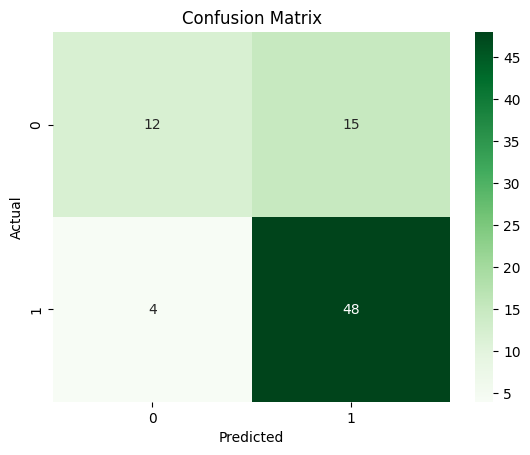

In [18]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
import joblib

# Save the model
joblib.dump(model, 'student_pass_predictor.joblib')

print("Model saved successfully!")


Model saved successfully!
